## S10 T01
### Aprenentage Supervisat Classificació
#### Eloi Canals

#### - Exercici 1
#### Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0)

In [1]:
# Carreguem llibreries i el dataset DelayedFlights.csv

import pandas as pd
import matplotlib.pyplot as plt #, mpld3
import numpy as np
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

df = pd.read_csv('DelayedFlights.csv', index_col=0)

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


#### Tractament de dades, NaNs, normalització, categorització de features i estandarització

In [3]:
# Categorització de UniqueCarrer per reduir espai
df['UniqueCarrier'].describe()

count     1936758
unique         20
top            WN
freq       377602
Name: UniqueCarrier, dtype: object

In [4]:
df['UniqueCarrier'].value_counts()

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64

In [5]:
df['UniqueCarrier'].nbytes

15494064

In [6]:
df['UniqueCarrier'] = df['UniqueCarrier'].astype("category")

In [7]:
# Comprovem com s'ha reduit l'espai en memoria utilitzat
df['UniqueCarrier'].nbytes

1936918

In [8]:
# Comprovem les categories
df['UniqueCarrier'].cat.categories

Index(['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ',
       'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV'],
      dtype='object')

In [9]:
# Fem el mateix amb Year Month DayofMonth DayOfWeek
# Que tot i ser numeriques, les tractarem con si fosin categories de tipus data
df['Year'].nbytes + df['Month'].nbytes + df['DayofMonth'].nbytes + df['DayOfWeek'].nbytes

61976256

In [10]:
df['Year'] = df['Year'].astype("category")
df['Month'] = df['Month'].astype("category")
df['DayofMonth'] = df['DayofMonth'].astype("category")
df['DayOfWeek'] = df['DayOfWeek'].astype("category")

In [11]:
# Tamanys after
df['Year'].nbytes + df['Month'].nbytes + df['DayofMonth'].nbytes + df['DayOfWeek'].nbytes

7747440

In [12]:
df['Month'].cat.categories

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [13]:
df.dtypes

Year                 category
Month                category
DayofMonth           category
DayOfWeek            category
DepTime               float64
CRSDepTime              int64
ArrTime               float64
CRSArrTime              int64
UniqueCarrier        category
FlightNum               int64
TailNum                object
ActualElapsedTime     float64
CRSElapsedTime        float64
AirTime               float64
ArrDelay              float64
DepDelay              float64
Origin                 object
Dest                   object
Distance                int64
TaxiIn                float64
TaxiOut               float64
Cancelled               int64
CancellationCode       object
Diverted                int64
CarrierDelay          float64
WeatherDelay          float64
NASDelay              float64
SecurityDelay         float64
LateAircraftDelay     float64
dtype: object

In [14]:
# No te sentit categoritzar Origin i Dest per la gran cantitat de opcions que tenen i tampoc 
# el CancellationCode perque sempre te el mateix valor

In [15]:
# Tractament dels NaNs
display(df.isna().sum().to_frame().T)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,0,0,0,0,7110,0,0,0,...,7110,455,0,0,0,689270,689270,689270,689270,689270


In [16]:
df_drop = df.dropna()

In [17]:
display(df_drop.isna().sum().to_frame().T)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_drop.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1247486.0,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06
mean,1.558832e+03,1.487949e+03,1.616749e+03,1.652458e+03,2.276526e+03,1.353779e+02,1.317641e+02,1.074203e+02,6.329104e+01,5.967721e+01,7.415867e+02,7.297232e+00,2.066033e+01,0.0,0.0,1.917943e+01,3.703355e+00,1.502162e+01,9.013728e-02,2.529649e+01
std,4.543300e+02,4.211782e+02,5.839416e+02,4.617372e+02,1.997547e+03,7.229636e+01,6.953201e+01,6.817454e+01,6.075380e+01,5.986881e+01,5.593643e+02,6.033239e+00,1.667983e+01,0.0,0.0,4.354624e+01,2.149153e+01,3.383308e+01,2.022716e+00,4.205489e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,1.500000e+01,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.232000e+03,1.150000e+03,1.326000e+03,1.340000e+03,6.370000e+02,8.300000e+01,8.000000e+01,5.800000e+01,2.600000e+01,2.400000e+01,3.340000e+02,4.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.618000e+03,1.529000e+03,1.737000e+03,1.722000e+03,1.589000e+03,1.180000e+02,1.150000e+02,9.000000e+01,4.300000e+01,4.100000e+01,5.950000e+02,6.000000e+00,1.600000e+01,0.0,0.0,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,1.924000e+03,1.830000e+03,2.048000e+03,2.022000e+03,3.676000e+03,1.670000e+02,1.610000e+02,1.360000e+02,7.900000e+01,7.500000e+01,9.720000e+02,8.000000e+00,2.400000e+01,0.0,0.0,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [19]:
#### Creem nova columna basada en ArrDelay per convertir en categoria la dada x > 0

In [20]:
df_cat = df
df_cat['BinaryDelay']= df_cat['ArrDelay'].apply(lambda x: 1 if (x > 0) else 0) 

In [21]:
df_cat.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'BinaryDelay'],
      dtype='object')

In [22]:
# Eliminar columnes NaNs desde el principi
df_cat.drop(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1, inplace=True)

In [23]:
df_cat['BinaryDelay']

0          0
1          1
2          1
4          1
5          1
          ..
7009710    1
7009717    1
7009718    1
7009726    1
7009727    0
Name: BinaryDelay, Length: 1936758, dtype: int64

In [24]:
print(df_cat['BinaryDelay'].value_counts())

1    1723415
0     213343
Name: BinaryDelay, dtype: int64


In [25]:
df_cat.shape

(1936758, 25)

In [26]:
# Fem un sample per treballar sense delays al treballar amb un dataset molt voluminós
np.random.seed(1234)
df_cat_sample = df_cat.sample(n = 10000)

BinaryDelayTemp = df_cat_sample[['BinaryDelay']]


In [27]:
# Normalitzem amb standardScaler
list_nums = []

for column in df_cat:
    if df_cat_sample[column].dtype == 'int64' or df_cat[column].dtype == 'float64':
        list_nums.append(column)
        
#df_nums.append('BinaryDelay')
df_nums =  df_cat_sample[list_nums]

In [28]:
scaler = StandardScaler()
df_standarized = pd.DataFrame(scaler.fit_transform(df_cat_sample[list_nums].values))
df_standarized.columns = list_nums

In [29]:
BinaryDelayTemp.head()

,BinaryDelay
1006678,1
5999756,1
737895,1
3149009,1
4565447,1


In [30]:
# Si ho afegeixo aqui peten les grafiques de despres

df_std2 = df_standarized

#df_std2['BinaryDelay'] = df_cat[['BinaryDelay']].astype('int')
df_std2['BinaryDelay'] = BinaryDelayTemp.values

In [31]:
df_std2.BinaryDelay

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: BinaryDelay, Length: 10000, dtype: int64

In [32]:
df_std2 = df_std2.dropna(subset=["ArrTime","ActualElapsedTime"])

In [33]:
df_std2.count()

DepTime              9961
CRSDepTime           9961
ArrTime              9961
CRSArrTime           9961
FlightNum            9961
ActualElapsedTime    9961
CRSElapsedTime       9961
AirTime              9961
ArrDelay             9961
DepDelay             9961
Distance             9961
TaxiIn               9961
TaxiOut              9961
Cancelled            9961
Diverted             9961
BinaryDelay          9961
dtype: int64

Text(0.5, 0, 'Variables Std')

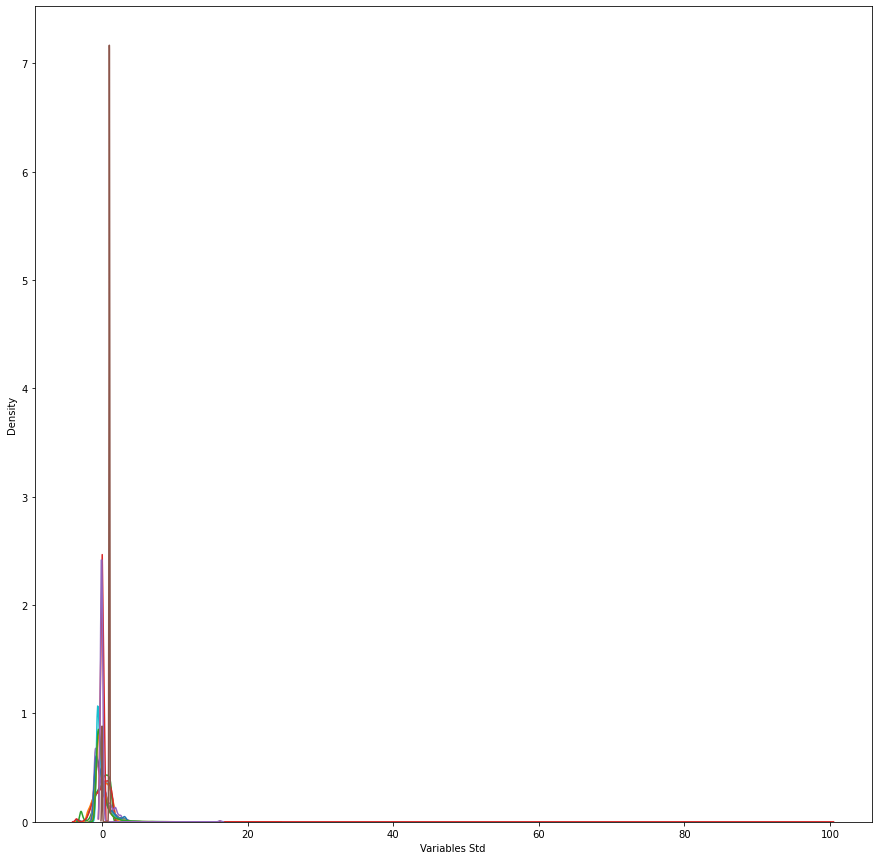

In [34]:
# Comprovació gràfica de la standarització
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(15,15))

for column in df_standarized:
    sns.kdeplot(df_standarized[column])

plt.xlabel('Variables Std')

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


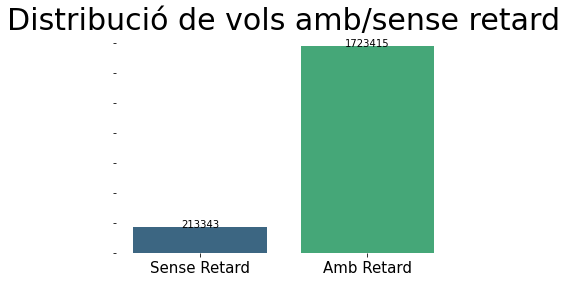

In [35]:
# df.somecolumn = df.somecolumn.replace({True: 1, False: 0})

# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(df_cat.BinaryDelay, palette='viridis')
g.set_xticklabels(['Sense Retard', 'Amb Retard'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribució de vols amb/sense retard', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

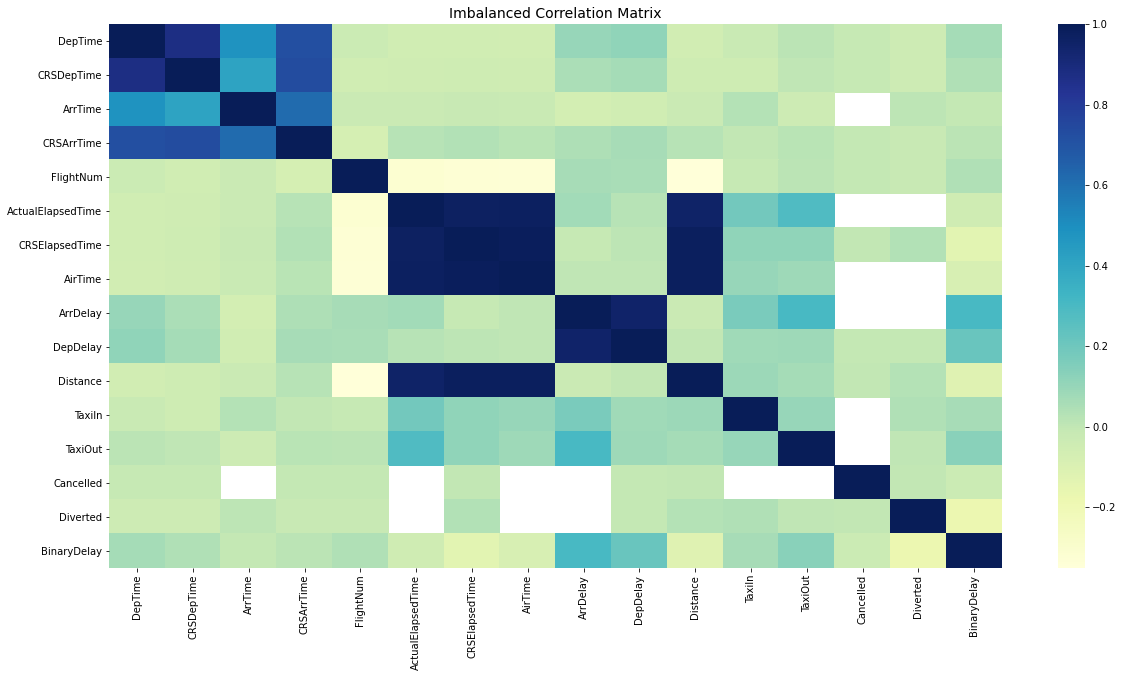

In [36]:
# Balancejarem per poder entrenar el model amb una distribució més pròxima al 50/50

 # Before resampling
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df_standarized.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [37]:
from sklearn.utils import resample

In [38]:
#df_standarized.drop(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1, inplace=True)

In [39]:
df_standarized

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,BinaryDelay
0,0.065291,0.146179,0.160646,-0.000959,-1.014080,-0.808863,-0.945613,-0.820250,-0.325800,-0.529775,-0.807472,-0.351944,-0.011756,-0.010001,-0.061762,1
1,1.150562,1.283178,0.941819,1.019279,0.189799,-1.134041,-1.102477,-1.013204,-0.419802,-0.388496,-1.000488,-0.547966,-0.657605,-0.010001,-0.061762,1
2,-0.939755,-1.078464,-0.390228,-0.651388,0.226499,-0.073679,0.166695,-0.003907,-0.325800,-0.005025,0.334540,-0.351944,-0.227039,-0.010001,-0.061762,1
3,1.132735,1.117366,0.997091,1.075838,1.793764,-0.596791,-0.303897,-0.493713,-0.344600,0.055523,-0.432163,-0.547966,-0.442322,-0.010001,-0.061762,1
4,0.660296,0.596241,0.707836,0.466741,1.170890,-0.384718,-0.589104,-1.161629,0.463823,0.216984,-1.170271,-0.743988,3.935102,-0.010001,-0.061762,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.690165,-0.777633,-0.152560,-0.416450,-0.931375,0.166670,-0.104252,0.129676,0.069011,-0.307766,-0.028259,-0.351944,0.347050,-0.010001,-0.061762,1
9996,-0.607711,-0.552602,-0.489717,-0.655738,-0.955670,-0.116093,-0.175554,0.070306,-0.551406,-0.671054,-0.181957,-0.547966,-0.729366,-0.010001,-0.061762,1
9997,1.636372,1.745084,-2.905089,1.552240,-1.085931,-0.370580,-0.389459,-0.330444,0.087812,0.075705,-0.299911,-0.155921,-0.227039,-0.010001,-0.061762,1
9998,-0.202127,-0.303883,0.182755,-0.014011,0.060055,-0.356442,-0.318157,-0.211703,0.012610,0.075705,-0.208765,-0.547966,-0.585844,-0.010001,-0.061762,1


In [40]:
# Separate input features and target
#y = df_standarized.BinaryDelay
#X = df_standarized.drop('BinaryDelay', axis=1)
y = df_standarized.BinaryDelay
X = df_standarized

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [41]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,BinaryDelay,BinaryDelay
1470,0.404021,0.394898,0.359624,0.353623,0.938281,-0.017126,0.166695,0.070306,-0.607808,-0.388496,0.112929,0.040101,-0.442322,-0.010001,-0.061762,1,1
8042,1.393467,1.567428,1.262395,1.326003,-0.743221,-0.780587,-0.803010,-0.775722,-0.551406,-0.610506,-0.714539,-0.155921,-0.155278,-0.010001,-0.061762,1,1
8491,-0.235554,-0.635508,0.256451,-0.255474,-0.775269,0.421157,0.095393,0.307788,2.099469,1.791232,-0.028259,-0.351944,0.777616,-0.010001,-0.061762,1,1
9706,0.845260,0.868647,0.724417,0.671224,-1.110742,-0.865416,-0.888572,-0.849935,-0.382201,-0.428862,-0.954022,1.216234,-0.729366,-0.010001,-0.061762,1,1
147,-0.866215,-1.327183,-0.318375,-1.079931,-1.032172,2.556020,1.992022,2.118584,2.607083,1.972876,1.780375,0.040101,2.715164,-0.010001,-0.061762,1,1


In [42]:
# separate minority and majority classes
not_delay = df_std2[df_std2.BinaryDelay==0]
delay = df_std2[df_std2.BinaryDelay==1]

# upsample minority
delay_upsampled = resample(delay,
                          replace=True, # sample with replacement
                          n_samples=len(not_delay), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
df_upsampled = pd.concat([not_delay, delay_upsampled])

# check new class counts
df_upsampled.BinaryDelay.value_counts()

0    1058
1    1058
Name: BinaryDelay, dtype: int64

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


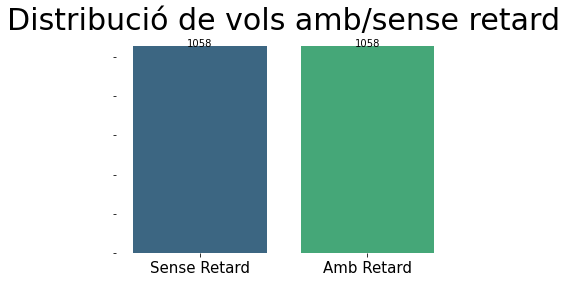

In [43]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(df_upsampled.BinaryDelay, palette='viridis')
g.set_xticklabels(['Sense Retard', 'Amb Retard'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribució de vols amb/sense retard', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

#### Model Classificació 1. Decisión Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [45]:
df_upsampled.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,BinaryDelay
10,0.421849,0.537023,0.370679,0.416708,-0.018515,-0.893692,-0.560583,-0.909305,-1.040220,-0.630688,-0.898619,0.040101,-0.155278,-0.010001,-0.061762,0
16,0.430762,0.537023,0.519912,0.584210,-1.082312,-0.370580,-0.032950,-0.211703,-0.965018,-0.549958,-0.174808,0.236123,-0.944649,-0.010001,-0.061762,0
21,0.303739,0.406741,0.602820,0.790868,-0.407230,-0.342304,0.109654,-0.330444,-1.153023,-0.590323,-0.053279,-0.547966,0.060005,-0.010001,-0.061762,0
38,-1.929201,-1.950163,-1.768335,-2.047961,-0.539042,-0.978521,-0.888572,-0.968676,-0.814613,-0.731602,-0.918278,0.236123,-0.370561,-0.010001,-0.061762,0
43,-0.710221,-0.753945,-0.661059,-0.742752,0.719629,-1.063350,-0.959874,-0.909305,-0.795813,-0.691236,-0.834280,-0.547966,-0.801127,-0.010001,-0.061762,0


In [46]:
display(df_standarized.isna().sum().to_frame().T)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,BinaryDelay
0,0,0,28,0,0,39,0,39,39,0,0,28,1,0,0,0


In [47]:
# Split dataset into training set and test set
# Separate input features and target

# No utilitzem el upsampled perque dona error (NaNs)

y = df_std2.BinaryDelay
X = df_std2.drop('BinaryDelay', axis=1)
#y = df_upsampled.BinaryDelay
#X = df_upsampled.drop('BinaryDelay', axis=1)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [48]:
# Tractament dels NaNs
display(X_train_1.isna().sum().to_frame().T)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
df_std2.count()

DepTime              9961
CRSDepTime           9961
ArrTime              9961
CRSArrTime           9961
FlightNum            9961
ActualElapsedTime    9961
CRSElapsedTime       9961
AirTime              9961
ArrDelay             9961
DepDelay             9961
Distance             9961
TaxiIn               9961
TaxiOut              9961
Cancelled            9961
Diverted             9961
BinaryDelay          9961
dtype: int64

In [50]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_1,y_train_1)

#Predict the response for test dataset
y_pred_1 = clf.predict(X_test_1)

In [51]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))

Accuracy: 1.0


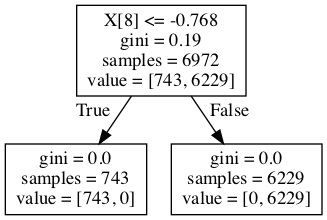

In [52]:
import graphviz
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz

import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data)
with open("DelayedFlightsTree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DelayedFlightsTree.png')
Image(graph.create_png())

#### Model Classificació 2. KNeighborsClassifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
modelknc= KNeighborsClassifier(n_neighbors=3, weights='distance',leaf_size=40)
modelknc.fit(X_train_2, y_train_2)
y_pred_2 = modelknc.predict(X_test_2)

In [55]:
# make class predictions for the testing set
y_pred_2 = modelknc.predict(X_test_2)

In [56]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test_2, y_pred_2))

0.9103379056540649


#### Model Classificació 3. RandomForest

In [57]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.3, random_state=1)

In [58]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(X_train_3,y_train_3)

y_pred_3=clf_rf.predict(X_test_3)

In [59]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))

Accuracy: 1.0


In [60]:
df_std2.columns

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted',
       'BinaryDelay'],
      dtype='object')

In [61]:
feature_imp = pd.Series(clf_rf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

ArrDelay             0.785483
DepDelay             0.087354
CRSElapsedTime       0.019224
TaxiOut              0.019112
ActualElapsedTime    0.016540
Distance             0.014489
AirTime              0.011831
DepTime              0.008615
FlightNum            0.008306
CRSArrTime           0.007834
ArrTime              0.007497
TaxiIn               0.006883
CRSDepTime           0.006833
Cancelled            0.000000
Diverted             0.000000
dtype: float64

No handles with labels found to put in legend.


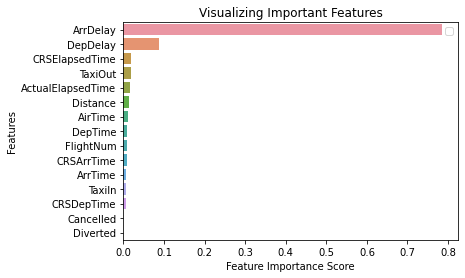

In [62]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### - Exercici 2
#### Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.



`
TN	FP
FN	TP
`

A part de 1 Fals Positiu i un Fals Negatiu. El models acerten amb les prediccions
El que millor funciona es Random Forest

In [63]:
# Confusion Matrix Model 1. Decision Tree
print(metrics.confusion_matrix(y_test_1, y_pred_1))

[[ 315    0]
 [   0 2674]]


In [64]:
# Confusion Matrix Model 2. KNeighborsClassifier
print(metrics.confusion_matrix(y_test_2, y_pred_2))

[[ 126  189]
 [  79 2595]]


In [65]:
# Confusion Matrix Model 3. Random Forest
print(metrics.confusion_matrix(y_test_3, y_pred_3))

[[ 315    0]
 [   0 2674]]


#### Conclusions

Veiem que els models Decision Tree i Random Forest son els millors en quan a accuracy, seguit del KNeighborsClassifier

#### - Exercici 3
#### Entrena’ls utilitzant els diferents paràmetres que admeten.

In [66]:
# Modifiquem parametres del Random Forest que es el que millor funciona a priori
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Create a Gaussian Classifier
clf_rf_mod=RandomForestRegressor(max_depth=10, n_estimators=150, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf_mod.fit(X_train_3,y_train_3)

y_pred_mod=clf_rf_mod.predict(X_test_3)

In [67]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))

Accuracy: 1.0


#### - Exercici 4
#### Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

In [68]:
# Ja hem fet els tres models de classificació amb train/test. Farem el Cross-Validation
# i compararem resultats

# Comparem amb KFold Cross-validation

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression()
kfold = KFold(n_splits=10)
score = cross_val_score(model,X,y,cv = kfold,scoring = "neg_mean_squared_error")

In [71]:
score

array([-0.08075814, -0.07676508, -0.08786312, -0.08138814, -0.06227573,
       -0.07582156, -0.08557813, -0.0806154 , -0.07329208, -0.08570544])

In [72]:
score.mean()

-0.0790062806759265

In [73]:
score = -score.mean()

In [74]:
score = np.sqrt(score)

In [75]:
score

0.2810805590501173

#### - Exercici 5
#### Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


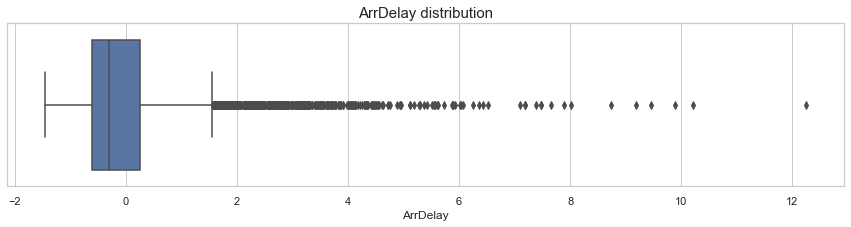

In [76]:
# Tractament dels outliers a ArrDelay

out = df_std2['ArrDelay']
plt.figure(figsize=(15,3))
sns.set_theme(style="whitegrid")
plt.title("ArrDelay distribution",fontsize=15)
plt.xlabel("ArrDelay",fontsize=12)
ax = sns.boxplot(out)

In [77]:
# eliminate outliers from Q1 and Q3 - 0.25 0.75
Q1 = out.quantile(q=0.25)
Q3 = out.quantile(q=0.75)
print(Q1, Q3)


-0.6078076392042394 0.257016686108828


In [78]:
df_mod = df_std2[(df_std2['ArrDelay'] >= -0.60) & (df_std2['ArrDelay'] <=0.25)]
df_mod.head(3)

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,BinaryDelay
0,0.065291,0.146179,0.160646,-0.000959,-1.014080,-0.808863,-0.945613,-0.820250,-0.325800,-0.529775,-0.807472,-0.351944,-0.011756,-0.010001,-0.061762,1
1,1.150562,1.283178,0.941819,1.019279,0.189799,-1.134041,-1.102477,-1.013204,-0.419802,-0.388496,-1.000488,-0.547966,-0.657605,-0.010001,-0.061762,1
2,-0.939755,-1.078464,-0.390228,-0.651388,0.226499,-0.073679,0.166695,-0.003907,-0.325800,-0.005025,0.334540,-0.351944,-0.227039,-0.010001,-0.061762,1


/Users/ecanals/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


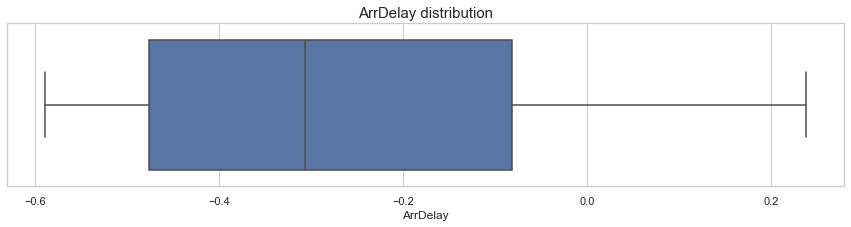

In [79]:
out = df_mod['ArrDelay']
plt.figure(figsize=(15,3))
sns.set_theme(style="whitegrid")
plt.title("ArrDelay distribution",fontsize=15)
plt.xlabel("ArrDelay",fontsize=12)
ax = sns.boxplot(out)

In [80]:
# Llencem els tres models amb el nou dataset



y2 = df_mod.BinaryDelay
X2 = df_mod.drop('BinaryDelay', axis=1)

X_train_1m, X_test_1m, y_train_1m, y_test_1m = train_test_split(X2, y2, test_size=0.3, random_state=1) # 70% training and 30% test

In [81]:
# 1. DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_1m,y_train_1m)

#Predict the response for test dataset
y_pred_1m = clf.predict(X_test_1m)

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_1m, y_pred_1m))

Accuracy: 1.0


In [83]:
# 2. Logistic Regression 
X_train_2m, X_test_2m, y_train_2m, y_test_2m = train_test_split(X2, y2, test_size=0.3)

In [84]:
modelknc = KNeighborsClassifier(n_neighbors=3, weights='distance',leaf_size=40)
modelknc.fit(X_train_2m, y_train_2m)
y_pred_2m = modelknc.predict(X_test_2m)

In [85]:
print(metrics.accuracy_score(y_test_2m, y_pred_2m))

1.0


In [86]:
# 3. Random forest
X_train_3m, X_test_3m, y_train_3m, y_test_3m = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [87]:
#Create a random Forest
clf_rf_mod=RandomForestRegressor(max_depth=10, n_estimators=150, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf_mod.fit(X_train_3m,y_train_3m)

y_pred_mod=clf_rf_mod.predict(X_test_3m)

In [88]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_3m, y_pred_mod))

Accuracy: 1.0


In [89]:
# Confusion Matrix Model 1. Decision Tree
print(metrics.confusion_matrix(y_test_1m, y_pred_1m))

[[1445]]


In [90]:
# Confusion Matrix Model 1. Decision Tree
print(metrics.confusion_matrix(y_test_2m, y_pred_2m))

[[1445]]


In [91]:
# Confusion Matrix Model 1. Decision Tree
print(metrics.confusion_matrix(y_test_3m, y_pred_mod))

[[1445]]


#### Conclusions.

El tractament de outliers ha fet millorar el KNeighborsClassifier fins al 1.0

#### - Exercici 6
#### No utilitzis la variable DepDelay a l’hora de fer prediccions

In [92]:
y3 = df_std2.BinaryDelay
X3 = df_std2.drop(['BinaryDelay','DepDelay'], axis=1)

In [93]:
X3.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,0.065291,0.146179,0.160646,-0.000959,-1.014080,-0.808863,-0.945613,-0.820250,-0.325800,-0.807472,-0.351944,-0.011756,-0.010001,-0.061762
1,1.150562,1.283178,0.941819,1.019279,0.189799,-1.134041,-1.102477,-1.013204,-0.419802,-1.000488,-0.547966,-0.657605,-0.010001,-0.061762
2,-0.939755,-1.078464,-0.390228,-0.651388,0.226499,-0.073679,0.166695,-0.003907,-0.325800,0.334540,-0.351944,-0.227039,-0.010001,-0.061762
3,1.132735,1.117366,0.997091,1.075838,1.793764,-0.596791,-0.303897,-0.493713,-0.344600,-0.432163,-0.547966,-0.442322,-0.010001,-0.061762
4,0.660296,0.596241,0.707836,0.466741,1.170890,-0.384718,-0.589104,-1.161629,0.463823,-1.170271,-0.743988,3.935102,-0.010001,-0.061762


In [94]:
X_train_1m3, X_test_1m3, y_train_1m3, y_test_1m3 = train_test_split(X3, y3, test_size=0.3, random_state=1) # 70% training and 30% test

In [95]:
# 1. DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_1m3,y_train_1m3)

#Predict the response for test dataset
y_pred_1m3 = clf.predict(X_test_1m3)

In [96]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_1m3, y_pred_1m3))

Accuracy: 1.0


In [97]:
X_train_2m3, X_test_2m3, y_train_2m3, y_test_2m3 = train_test_split(X3, y3, test_size=0.3)

In [98]:
# 2.KNeighborsClassifier
modelknc = KNeighborsClassifier(n_neighbors=3, weights='distance',leaf_size=40)
modelknc.fit(X_train_2m3, y_train_2m3)
y_pred_2m3 = modelknc.predict(X_test_2m3)

In [99]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_2m3, y_pred_2m3))

Accuracy: 0.9089996654399465


In [100]:
# 3. Random forest
X_train_3m3, X_test_3m3, y_train_3m3, y_test_3m3 = train_test_split(X3, y3, test_size=0.3, random_state=1)

In [101]:
#Create a Random Forest
clf_rf_mod=RandomForestRegressor(max_depth=10, n_estimators=150, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf_mod.fit(X_train_3m3,y_train_3m3)

y_pred_mod=clf_rf_mod.predict(X_test_3m3)

In [102]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_3m3, y_pred_mod))

Accuracy: 1.0


In [103]:
feature_imp2 = pd.Series(clf_rf_mod.feature_importances_,index=X3.columns).sort_values(ascending=False)
feature_imp2

ArrDelay             1.0
DepTime              0.0
CRSDepTime           0.0
ArrTime              0.0
CRSArrTime           0.0
FlightNum            0.0
ActualElapsedTime    0.0
CRSElapsedTime       0.0
AirTime              0.0
Distance             0.0
TaxiIn               0.0
TaxiOut              0.0
Cancelled            0.0
Diverted             0.0
dtype: float64

No handles with labels found to put in legend.


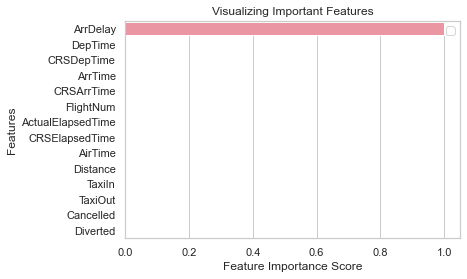

In [104]:
# Creating a bar plot
sns.barplot(x=feature_imp2, y=feature_imp2.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Conclusions

Al prescindir de DepDelay ha fet que tot el pes de les prediccions recaigui al ArrDelay

#### Extra Ball.

Prescindirem també del ArrDelay per veure si alguna variable ens pot ajudar a predir el retras en els vols.

In [105]:
y4 = df_std2.BinaryDelay
X4 = df_std2.drop(['BinaryDelay','DepDelay','ArrDelay'], axis=1)

In [106]:
X_train_1m4, X_test_1m4, y_train_1m4, y_test_1m4 = train_test_split(X4, y4, test_size=0.3, random_state=1) # 70% training and 30% test

In [107]:
# 1. DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_1m4,y_train_1m4)

#Predict the response for test dataset
y_pred_1m4 = clf.predict(X_test_1m4)

In [108]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_1m4, y_pred_1m4))

Accuracy: 0.8417530946804952


In [109]:
X_train_2m4, X_test_2m4, y_train_2m4, y_test_2m4 = train_test_split(X4, y4, test_size=0.3)

In [110]:
# 2.KNeighborsClassifier
modelknc = KNeighborsClassifier(n_neighbors=3, weights='distance',leaf_size=40)
modelknc.fit(X_train_2m4, y_train_2m4)
y_pred_2m4 = modelknc.predict(X_test_2m4)

In [111]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_2m4, y_pred_2m4))

Accuracy: 0.8758782201405152


In [112]:
# 3. Random forest
X_train_3m4, X_test_3m4, y_train_3m4, y_test_3m4 = train_test_split(X4, y4, test_size=0.3, random_state=1)

In [113]:
#Create a Ranodm Forest
clf_rf_mod=RandomForestClassifier(max_depth=10, n_estimators=100, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf_mod.fit(X_train_3m4,y_train_3m4)

y_pred_mod=clf_rf_mod.predict(X_test_3m4)

In [114]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_3m4, y_pred_mod))

Accuracy: 0.8946135831381733


In [115]:
feature_imp3 = pd.Series(clf_rf_mod.feature_importances_,index=X4.columns).sort_values(ascending=False)
feature_imp3

CRSElapsedTime       0.133259
ActualElapsedTime    0.118520
TaxiOut              0.112501
CRSArrTime           0.089773
AirTime              0.088059
Distance             0.086523
DepTime              0.085674
ArrTime              0.084165
CRSDepTime           0.075683
FlightNum            0.075606
TaxiIn               0.050237
Cancelled            0.000000
Diverted             0.000000
dtype: float64

No handles with labels found to put in legend.


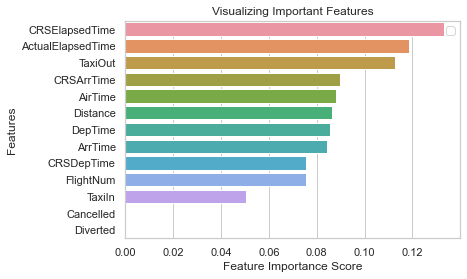

In [116]:
# Creating a bar plot
sns.barplot(x=feature_imp3, y=feature_imp3.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Conclusions

Al desactivar el ArrDelay veiem que baixen els index de accuracy en tots tres models i que la resta de variables analitzades passen a ser més preponderants, sent CRSElapsedTime la més definitoria.